In [46]:
import os
import itertools
import pandas as pd
import string
import nltk
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pandas import DataFrame
from functools import reduce
import seaborn as sns
from collections import Counter 
import tkinter as tk
plt.style.use('ggplot')

$$\text{Pre-Process the Data}$$

In [47]:
        ################################################# !!!!!PRE PROCESSING!!!!! ##################################################
def prepare_the_data(fname):
    flist = open(fname,errors="surrogateescape").readlines()
    ls= [s.rstrip('\n') for s in flist]
    s=[]
    for i in ls:
        s.append(i.split())
    s= list(itertools.chain(*s))
    
    #text converted to lower case
    lst = [x.lower() for x in s]
    
    # Removes the puctuation: !"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~
    lst = [''.join(c for c in s if c not in string.punctuation) for s in lst]
    
    # Removes the empty strings
    lst = [s for s in lst if s]
    
    return lst

List of lists of Spam/Ham Emails for Dataset.

In [48]:
# It creates a nested list for all the emails in a folder
def extract_data(dir_name,l):
    for entry in os.listdir(dir_name):
        path = os.path.join(dir_name,entry)
        l.append(prepare_the_data(path))

Generate the dictionary for Training Data

In [49]:
        ################################################# !!!!!GENERATING DICTIONARY!!!!! ##################################################
def generate_dictionary(lst):
    single_list = reduce(lambda x,y: x+y, lst)
    
    uniqueWordCount = 0
    count = {}
    for word in single_list:
        if word in count :
            count[word] += 1
        else:
            count[word] = 1
    return(count)


$$\text{Training  the Naïve Bayes Classifiers}$$

In [50]:
#Conditional Prob Func
def compute_conditional_probability(dictionary,vocubalary):
    log_prob_word_class = {}
    v_wc = len(vocubalary)
    class_wc = sum(dictionary.values())
    for word in vocubalary:
        count_word_class = dictionary.get(word) if dictionary.get(word)!=None else 0
        log_prob_word_class[word] = np.log(count_word_class+1/(class_wc+v_wc))
    return log_prob_word_class


In [51]:
#Train Func
def train_mnb(spam_dict, ham_dict, spam_list, ham_list):
    vocubalary = set(spam_dict.keys()).union(set(ham_dict.keys()))
    N_spam = len(spam_list)
    N_ham = len(ham_list)
    N_doc = len(spam_list) + len(ham_list)
                   
    prior_ham = np.log(N_ham / N_doc)
    prior_spam = np.log(N_spam / N_doc)
    
    log_prob_word_spam = compute_conditional_probability(spam_dict, vocubalary)
    log_prob_word_ham = compute_conditional_probability(ham_dict, vocubalary)
    
    return prior_ham,prior_spam,log_prob_word_ham,log_prob_word_spam

$$\text{Evaluating the Naive Bayes Model for Test Data}$$

In [52]:
#Naive Bayes Classifier Func
def naive_bayes_classifier(org_class_name, ls, spam_dict, ham_dict, spam, ham):
    for email in org_class_name:
        prob_spam = spam
        prob_ham = ham
        for word in email:
            prob_spam += spam_dict.get(word, 0)
            prob_ham += ham_dict.get(word, 0)
        if prob_ham > prob_spam:
            ls.append('ham')
        else:
            ls.append('spam')

$$\text{Remove Stopwrods}$$

In [1]:
def remove_stop_words(dic):    
    stopwords = open("stopwords.txt",errors="surrogateescape").readlines()
    stopwords= [s.rstrip('\n') for s in stopwords]
    for word in stopwords:
        if(word in dic.keys()):
            del dic[word]
        
    return dic

def remove_stop_words_from_nested_list(ls):
    stopwords = open("stopwords.txt",errors="surrogateescape").readlines()
    stopwords= [s.rstrip('\n') for s in stopwords]
    for stop_word in stopwords:
        for email in ls:
            for word in email:
                if(word==stop_word):
                    email.remove(word)
    return ls

$$\text{Visulaize the Data}$$

In [54]:
def visulaize_data(lst):
    words = reduce(lambda x,y: x+y, lst)
    df = DataFrame (words,columns=['words'])
    text = " ".join(review for review in df.words)
    wc = WordCloud(width=512,height=512).generate(text)
    plt.figure(figsize=(10,8),facecolor='k')
    plt.imshow(wc)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

No of emails tagged as spam:1622


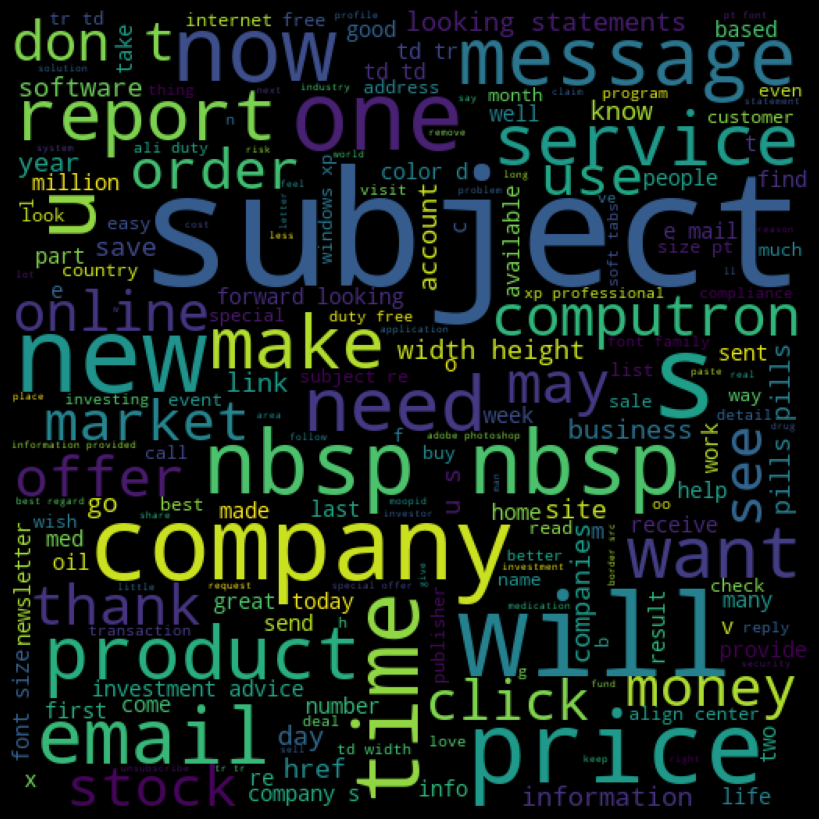

No of unique words in train/spam :38783
No of unique words in train/spam without stop words :38472
No of emails tagged as ham:1914


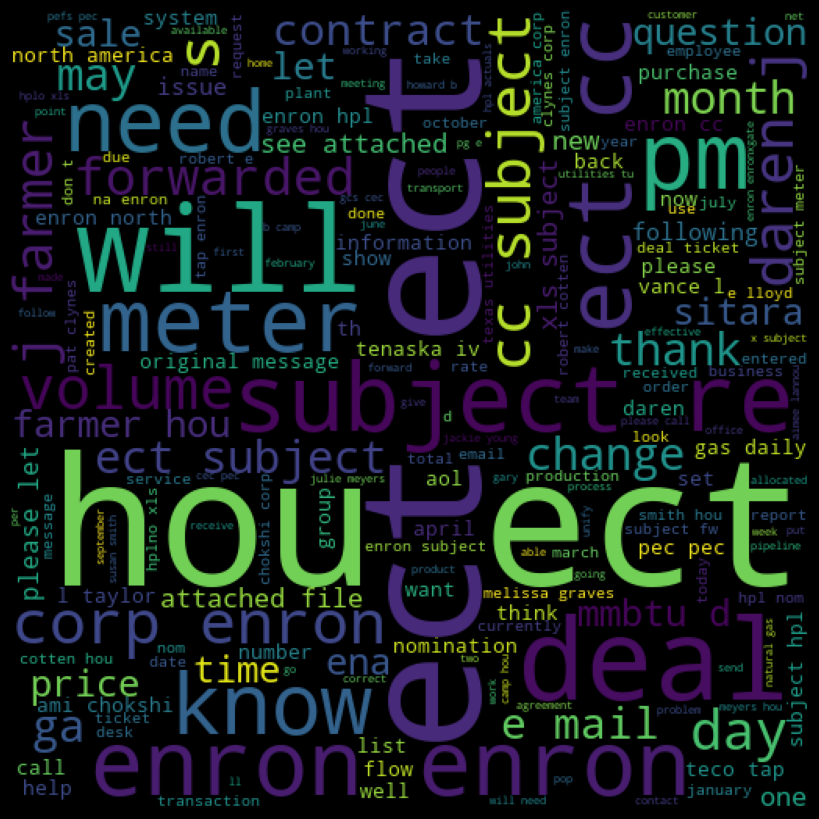

No of unique words in train/ham :14949
No of unique words in train/ham without stop words :14667


In [55]:
        ################################################# !!!!! TRAIN SPAM !!!!! ##################################################
train_spam = 'train/spam' ####### Enter where your spam folder is located
train_spam_list = []
extract_data(train_spam,train_spam_list)
print("No of emails tagged as spam:" + str(len(train_spam_list)))
visulaize_data(train_spam_list)
train_spam_list_withput_stop_words = train_spam_list.copy()
train_spam_list_withput_stop_words = remove_stop_words_from_nested_list(train_spam_list_withput_stop_words)

#Genearte a dictionary of unique words
train_spam_dict = generate_dictionary(train_spam_list)
print("No of unique words in train/spam :" + str(len(train_spam_dict)))
train_spam_dict_without_stopwords = train_spam_dict.copy()
train_spam_dict_without_stopwords = remove_stop_words(train_spam_dict_without_stopwords)
print("No of unique words in train/spam without stop words :" + str(len(train_spam_dict_without_stopwords)))

        ################################################# !!!!! TRAIN HAM !!!!! ##################################################
train_ham = 'train/ham'
train_ham_list = []
extract_data(train_ham,train_ham_list)
print("No of emails tagged as ham:" + str(len(train_ham_list)))
visulaize_data(train_ham_list)
train_ham_list_withput_stop_words = train_ham_list.copy()
train_ham_list_withput_stop_words = remove_stop_words_from_nested_list(train_ham_list_withput_stop_words)

#Genearte a dictionary of unique words
train_ham_dict = generate_dictionary(train_ham_list)
print("No of unique words in train/ham :" + str(len(train_ham_dict)))
train_ham_dict_without_stopwords = train_ham_dict.copy()
train_ham_dict_without_stopwords = remove_stop_words(train_ham_dict_without_stopwords)
print("No of unique words in train/ham without stop words :" + str(len(train_ham_dict_without_stopwords)))

In [56]:
# With stop words
prior_ham,prior_spam,log_prob_word_ham,log_prob_word_spam = train_mnb(train_spam_dict,train_ham_dict,train_spam_list,train_ham_list)
# Without stop words
prior_ham_sp,prior_spam_sp,log_prob_word_ham_sp,log_prob_word_spam_sp = train_mnb(train_spam_dict_without_stopwords,train_ham_dict_without_stopwords,train_spam_list,train_ham_list)

In [58]:
        ################################################# !!!!! TEST SPAM !!!!! ##################################################
test_spam = 'test/spam'
test_spam_list = []
extract_data(test_spam,test_spam_list)
# Without stop words
test_spam_list_withput_stop_words = test_spam_list.copy()
test_spam_list_withput_stop_words = remove_stop_words_from_nested_list(test_spam_list_withput_stop_words)

        ################################################# !!!!! TEST HAM !!!!! ##################################################
test_ham = 'test/ham'
test_ham_list = []
extract_data(test_ham,test_ham_list)
# Without stop words
test_ham_list_withput_stop_words = test_ham_list.copy()
test_ham_list_withput_stop_words = remove_stop_words_from_nested_list(test_ham_list_withput_stop_words)

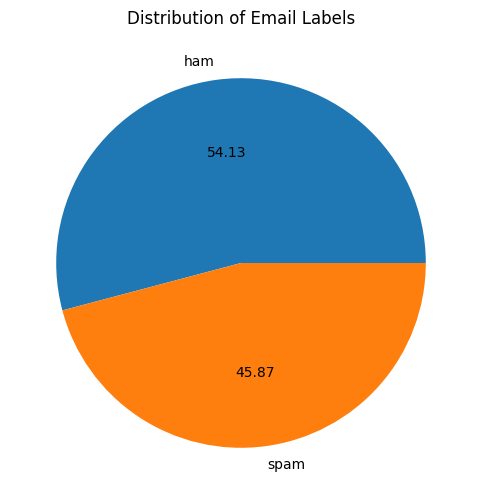

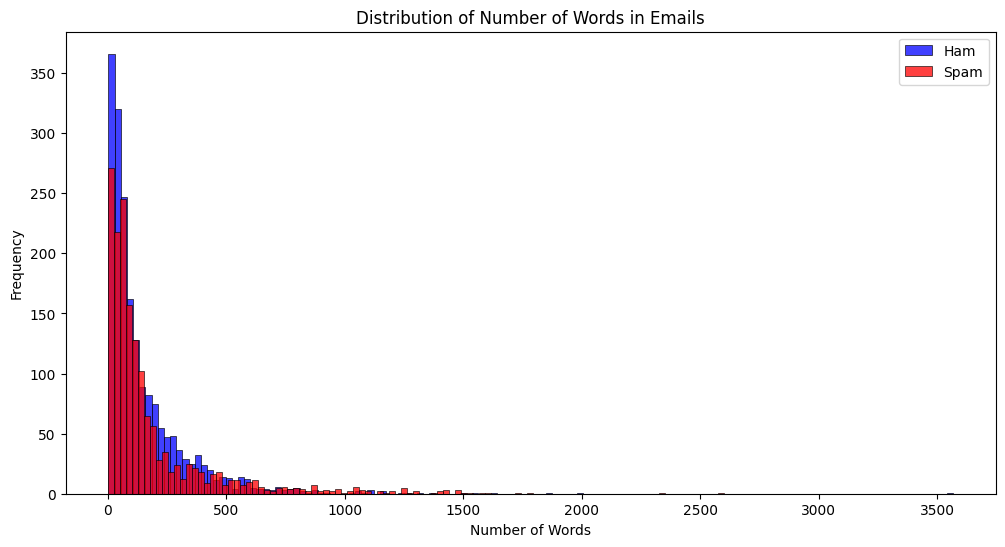

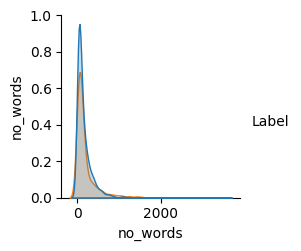

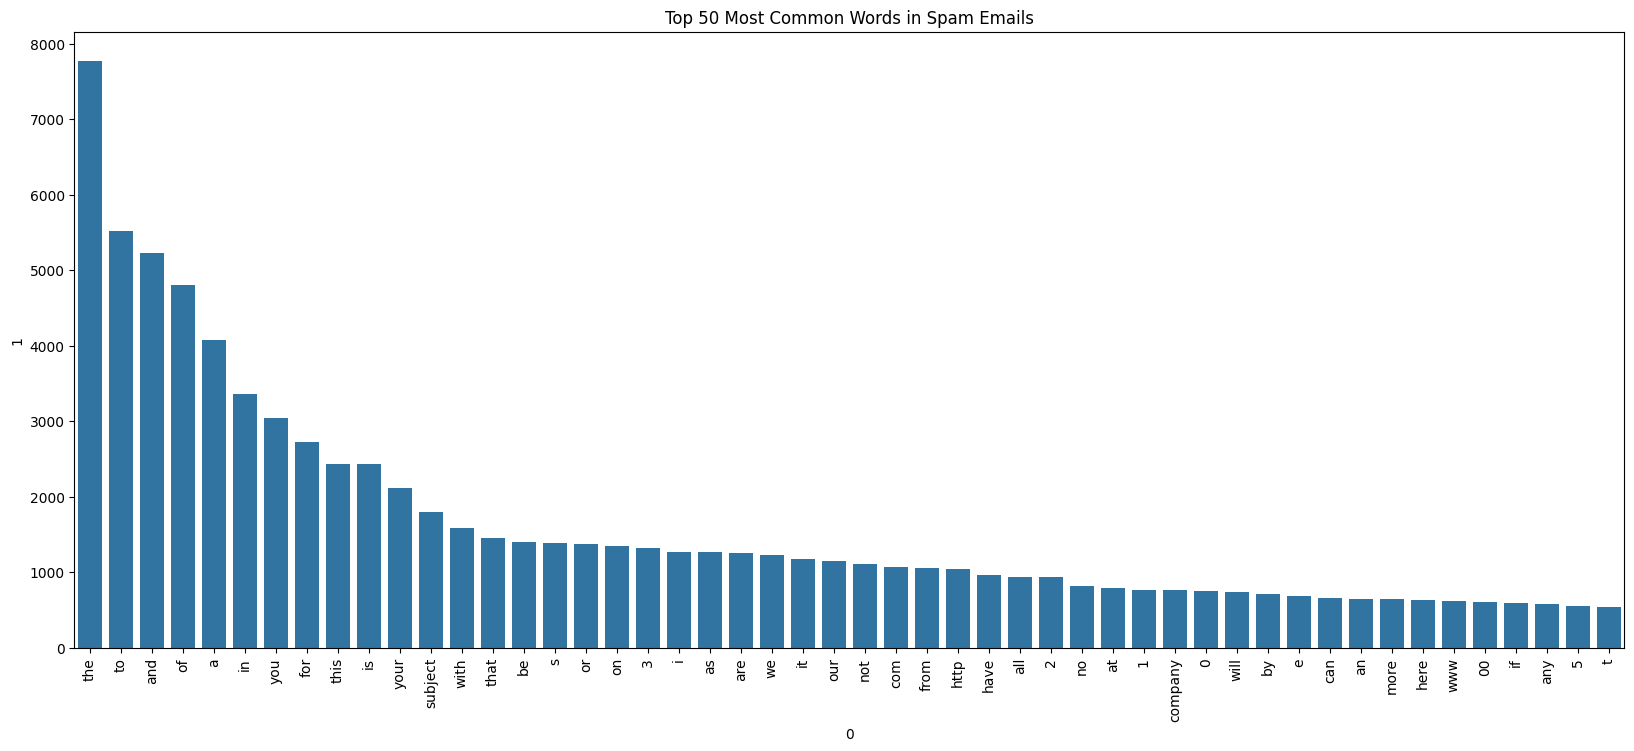

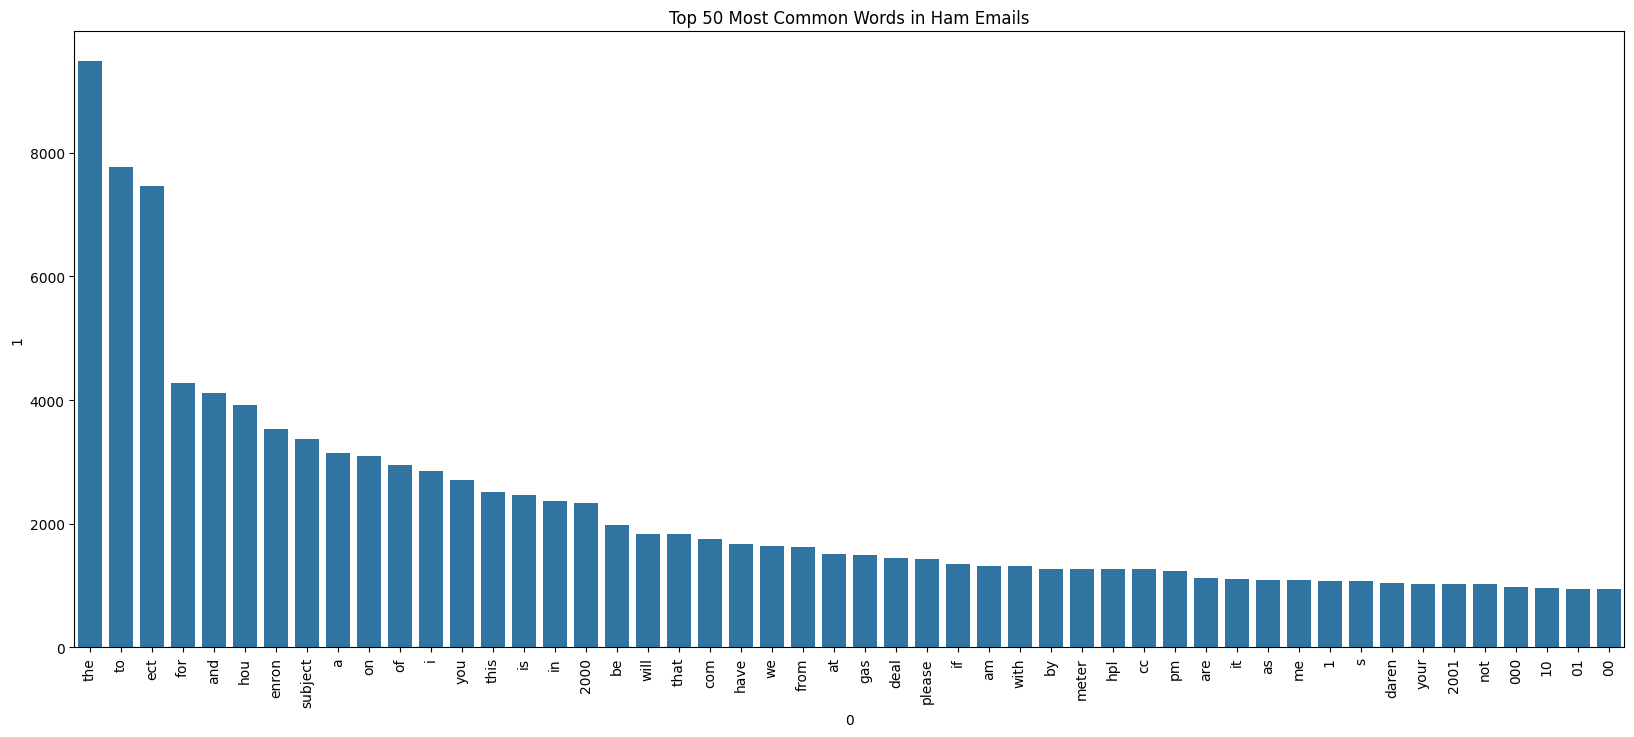

In [59]:
        ################################################# !!!!! VISUALIZATION !!!!! ##################################################

def visualize_email_data(df):
    # Pi Chart
    plt.figure(figsize=(12, 6))
    plt.pie(df['Label'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
    plt.title('Distribution of Email Labels')
    plt.show()

    # Histogram
    plt.figure(figsize=(12, 6))
    sns.histplot(df[df['Label'] == 0]['no_words'], color='blue', label='Ham')
    sns.histplot(df[df['Label'] == 1]['no_words'], color='red', label='Spam')
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.title('Distribution of Number of Words in Emails')
    plt.legend()
    plt.show()

    # Pairplot
    sns.pairplot(df, hue='Label')
    plt.show()

    # Barchart Spam
    spam_corpus = []
    for mail in df[df['Label'] == 1]['clean_text'].tolist():
        if isinstance(mail, list):
            spam_corpus.extend(mail)
        else:
            for word in mail.split():
                spam_corpus.append(word)
    plt.figure(figsize=(20, 8))
    sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(50))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(50))[1])
    plt.title('Top 50 Most Common Words in Spam Emails')
    plt.xticks(rotation='vertical')
    plt.show()

    # Barchart Ham
    ham_corpus = []
    for mail in df[df['Label'] == 0]['clean_text'].tolist():
        if isinstance(mail, list):
            ham_corpus.extend(mail)
        else:
            for word in mail.split():
                ham_corpus.append(word)
    plt.figure(figsize=(20, 8))
    sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(50))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(50))[1])
    plt.title('Top 50 Most Common Words in Ham Emails')
    plt.xticks(rotation='vertical')
    plt.show()




def create_dataframe(spam_list, ham_list):

    spam_list = [email if isinstance(email, list) else prepare_the_data(email) for email in spam_list]
    ham_list = [email if isinstance(email, list) else prepare_the_data(email) for email in ham_list]

    # Calculate number of words in each email
    spam_no_words = [len(email) for email in spam_list]
    ham_no_words = [len(email) for email in ham_list]

    df = pd.DataFrame({'clean_text': spam_list + ham_list,
                       'Label': [1] * len(spam_list) + [0] * len(ham_list),
                       'no_words': spam_no_words + ham_no_words})

    return df


df = create_dataframe(test_spam_list_withput_stop_words, test_ham_list_withput_stop_words)
visualize_email_data(df)

In [60]:
        ################################################# !!!!! CLASSIFIER SPAM !!!!! ##################################################
classifier_spam=[]
naive_bayes_classifier(test_spam_list,classifier_spam,log_prob_word_spam,log_prob_word_ham,prior_spam,prior_ham)

# Without stop words
classifier_spam_without_sw=[]
naive_bayes_classifier(test_spam_list_withput_stop_words,classifier_spam_without_sw,log_prob_word_spam_sp,log_prob_word_ham_sp,prior_spam_sp,prior_ham_sp)


        ################################################# !!!!! CLASSIFIER HAM !!!!! ##################################################
classifier_ham=[]
naive_bayes_classifier(test_ham_list,classifier_ham,log_prob_word_spam,log_prob_word_ham,prior_spam,prior_ham)

classifier_ham_without_sw=[]
naive_bayes_classifier(test_ham_list_withput_stop_words,classifier_ham_without_sw,log_prob_word_spam_sp,log_prob_word_ham_sp,prior_spam_sp,prior_ham_sp)

$$\text{Frequency Based Feature Selection}$$

In [61]:
#Feature Selection Func
def freq_based_feature_selection(percentage,dic):
    dic = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1], reverse=True)}
    for i in range(0,len(dic)-int(np.ceil(percentage*len(dic)))):
        dic.popitem()
    return dic

In [62]:
accuracy = {}
accuracy_ham = {}
accuracy_spam = {}
for i in [1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]:
    
    sorted_train_spam_dict = train_spam_dict.copy()
    sorted_train_spam_dict = freq_based_feature_selection(i,sorted_train_spam_dict)
    sorted_train_ham_dict = train_ham_dict.copy()
    sorted_train_ham_dict = freq_based_feature_selection(i,sorted_train_ham_dict)

    # Train the Model
    prior_ham_fr,prior_spam_fr,log_prob_word_ham_fr,log_prob_word_spam_fr = train_mnb(sorted_train_spam_dict,sorted_train_ham_dict,train_spam_list,train_ham_list)
    
    classifier_spam_fr=[]
    naive_bayes_classifier(test_spam_list,classifier_spam_fr,log_prob_word_spam_fr,log_prob_word_ham_fr,prior_spam_fr,prior_ham_fr)

    classifier_ham_fr=[]
    naive_bayes_classifier(test_ham_list,classifier_ham_fr,log_prob_word_spam_fr,log_prob_word_ham_fr,prior_spam_fr,prior_ham_fr)
    
    #Calculate the accuracy
    Accuracy_for_ham = classifier_ham_fr.count('ham')/len(classifier_ham_fr)
    accuracy_ham[i] = Accuracy_for_ham
    
    Accuracy_for_spam = classifier_spam_fr.count('spam')/len(classifier_spam_fr)
    accuracy_spam[i] = Accuracy_for_spam
    
    Overall_Accuracy = (classifier_ham_fr.count('ham')+classifier_spam_fr.count('spam'))/(len(classifier_ham_fr)+len(classifier_spam_fr))
    accuracy[i]=Overall_Accuracy

$$\text{Accuracy of the Naive Bayes Model for the Test Data}$$

In [63]:
def print_accuracy_of_model():
    print("Accuracy for ham:")
    print(classifier_ham.count('ham')/len(classifier_ham))
    print("Accuracy for spam:")
    print(classifier_spam.count('spam')/len(classifier_spam))
    print('Overall Accuracy:')
    print((classifier_ham.count('ham')+classifier_spam.count('spam'))/(len(classifier_ham)+len(classifier_spam)))

In [64]:
def print_accuracy_for_stop_words():
    print("\nAccuracy for ham without stop words:")
    print(classifier_ham_without_sw.count('ham')/len(classifier_ham_without_sw))
    print("Accuracy for spam without stop words:")
    print(classifier_spam_without_sw.count('spam')/len(classifier_spam_without_sw))
    print('Overall Accuracy without stop words:')
    print((classifier_ham_without_sw.count('ham')+classifier_spam_without_sw.count('spam'))/(len(classifier_ham_without_sw)+len(classifier_spam_without_sw)))
    
    print("\nConclusion: Removing stop words from the dataset didn't help in improving the accuracy as the no of token were "
      +" still very large, they were changed from "+str(len(log_prob_word_ham))+" to " + str(len(log_prob_word_ham_sp))+".")

In [65]:
def print_and_plt(sp,feature_selection):
    sp_label = "With Stop Words" if sp == 1 else "Without Stop Words"
    feature_selection_label = "With" if feature_selection == 1 else "Without"
    
    print(f"Key Value means percentage of tokens selected from both ham and spam with highest frequency.")
    print(f"1 means when no feature selection is done, we consider all the tokens for classification.\n")
    
    print(f"Overall Accuracy ({sp_label}, Feature Selection: {feature_selection_label}):")
    print(accuracy)
    list_1 = sorted(accuracy.items()) 
    x, y = zip(*list_1) 
    plt.plot(x, y, label='Overall Accuracy')
    
    print(f"\nHam Accuracy ({sp_label}, Feature Selection: {feature_selection_label}):")
    print(accuracy_ham)
    list_2 = sorted(accuracy_ham.items()) 
    x, y = zip(*list_2) 
    plt.plot(x, y, label='Ham Accuracy')
    
    print(f"\nSpam Accuracy ({sp_label}, Feature Selection: {feature_selection_label}):")
    print(accuracy_spam)
    list_3 = sorted(accuracy_spam.items()) 
    x, y = zip(*list_3) 
    plt.plot(x, y, label='Spam Accuracy')
    
    plt.xlabel('Percentage of Tokens Selected')
    plt.ylabel('Accuracy')
    
    plt.text(0.5, 1.05, f"SP: {sp_label}\nFeature Selection: {feature_selection_label}", transform=plt.gca().transAxes, horizontalalignment='center', fontsize=12)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()
    print("Conclusion: I would go with selecting 30 to 35 % of tokens with the highest frequency (feature selection),"
          +" for optimizing the accuracy of both sets of emails (spam and ham) and overall accuracy as observable from the above graph.\n")

In [66]:
def what_to_print(sp,feature_selection):
    if(sp==0 and feature_selection ==1):
        print_and_plt(0,1)
    elif(sp==1 and feature_selection ==0):
        print_accuracy_of_model()
        print_accuracy_for_stop_words()
    elif(sp==1 and feature_selection ==1):
        print_and_plt(1,1)
        print_accuracy_for_stop_words()
    else:
        print_accuracy_of_model()

In [ ]:
        ################################################# !!!!! INPUT EMAIL !!!!! ##################################################

def prepare_data_from_input(email):
    words = email.split()
    
    # Convert to lowercase
    words = [word.lower() for word in words]
    
    # Remove punctuation
    words = [''.join(c for c in word if c not in string.punctuation) for word in words]
    
    # Remove empty strings
    words = [word for word in words if word]

    words_without_stop_words = remove_stop_words_from_nested_list([words])[0]

    return words_without_stop_words


def classify_email(log_prob_word_spam, log_prob_word_ham, prior_spam, prior_ham, email):
    email_words = prepare_data_from_input(email)
    
    prob_spam = prior_spam
    prob_ham = prior_ham
    
    for word in email_words:
        prob_spam += log_prob_word_spam.get(word, 0)
        prob_ham += log_prob_word_ham.get(word, 0)
    
    if prob_ham > prob_spam:
        return 'ham'
    else:
        return 'spam'

# Function to take user input and classify the email
def classify_email_from_input(log_prob_word_spam, log_prob_word_ham, prior_spam, prior_ham):
    email = input("Enter the email content: ")
    
    classification = classify_email(log_prob_word_spam, log_prob_word_ham, prior_spam, prior_ham, email)
    
    print("The email is classified as:", classification)

Key Value means percentage of tokens selected from both ham and spam with highest frequency.
1 means when no feature selection is done, we consider all the tokens for classification.

Overall Accuracy (With Stop Words, Feature Selection: With):
{1: 0.9937238493723849, 0.9: 0.9895397489539749, 0.8: 0.9874476987447699, 0.7: 0.9895397489539749, 0.6: 0.9916317991631799, 0.5: 0.9895397489539749, 0.4: 0.9811715481171548, 0.3: 0.9707112970711297, 0.2: 0.9518828451882845, 0.1: 0.9205020920502092}

Ham Accuracy (With Stop Words, Feature Selection: With):
{1: 0.9942528735632183, 0.9: 0.9885057471264368, 0.8: 0.985632183908046, 0.7: 0.9885057471264368, 0.6: 0.9913793103448276, 0.5: 0.9885057471264368, 0.4: 0.9770114942528736, 0.3: 0.9626436781609196, 0.2: 0.9367816091954023, 0.1: 0.896551724137931}

Spam Accuracy (With Stop Words, Feature Selection: With):
{1: 0.9923076923076923, 0.9: 0.9923076923076923, 0.8: 0.9923076923076923, 0.7: 0.9923076923076923, 0.6: 0.9923076923076923, 0.5: 0.99230769230

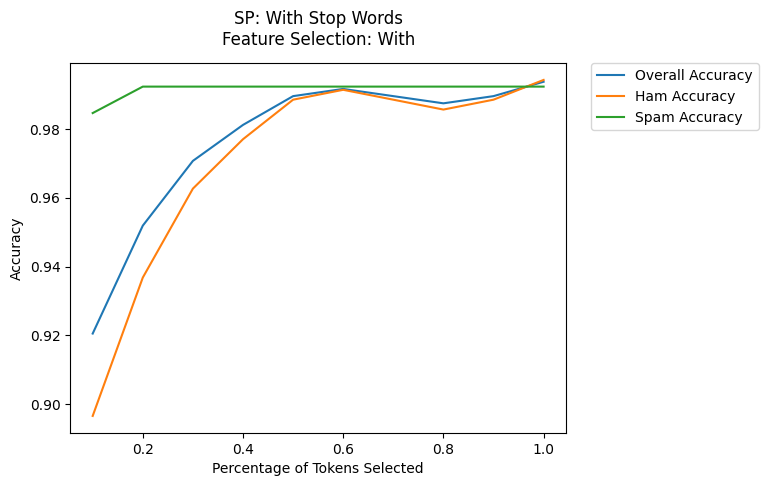

Conclusion: I would go with selecting 30 to 35 % of tokens with the highest frequency (feature selection), for optimizing the accuracy of both sets of emails (spam and ham) and overall accuracy as observable from the above graph.


Accuracy for ham without stop words:
0.9942528735632183
Accuracy for spam without stop words:
0.9923076923076923
Overall Accuracy without stop words:
0.9937238493723849

Conclusion: Removing stop words from the dataset didn't help in improving the accuracy as the no of token were  still very large, they were changed from 46815 to 46501.


In [67]:
what_to_print(1,1)
window = tk.Tk()
window.title("Email Classifier")
window.option_add("*TitleLabel.font", "Helvetica 12 bold")
window.option_add("*TitleLabel*foreground", "bright green")


email_label = tk.Label(window, text="Enter Email:", fg="green", font=("Helvetica", 12))
email_label.pack()

email_entry = tk.Text(window, height=10, width=50)
email_entry.pack()

classify_button = tk.Button(window, text="Classify", command=classify_email_from_gui)
classify_button.pack()

result_label = tk.Label(window, text="")
result_label.pack()

window.mainloop()